![ML_models.jpg](https://lh3.googleusercontent.com/7AqWfylPqHIoe0LrUN-N5YY_OnEJhOjdb_-1EwEjrUvA7wSxxMigtpfiKwVnXD30hamAvxy4angTczmHStoGSzQqTsTxYjRBrlQrTbtT-ZczOwXJQy6ff6GQP3a5V7nsKn6pJV-tmlsdceFhlY93ULyoj_zv7SMBZRoTpQoxTpgkEADkvmM1hQ2kM5FrrfdueusgR4HS8OzbACPEs_1vioNhtdC__E0gWe8HAcSo_O4Gwhsv8_qEa8mka9Y0d_KktQiXpPF91SBo36jzDBGtRQAeQqhANGvbfxTfnGiNGUD8rsmeSFwfMQJ9HKaR3xM1VCEd0VF2GT7qB--1yfCRjwnPvjc1lfDXaiPH6_Aywm8luWdd7iplXQ2-ib6sbVKJx5v_hIBqEGVAkzQktEk4uOyWjkYrUUvaCX_ZTCgMVbdDVQ_97mQ3j29PGa0iAMnSlRE0Zg8wK3NzCZOLUOlse9m-VaKY40WzWWyH0g2aTmhtbGOauMrG-RC5sGcQ7unWfRMDsmV9k8Y8a1sSa-VwYcqyp_BPdogGdA1q0WQ4vAUYTC-li7TmXId7-10X5k3_XHqxL8BUoMqF1njoiVNDwv9fWuSWgilsnWR5S_SiI5LDmPnwAgQnXiDrKa2UahMFL_c3mDrksdstInzBSfa6jGWvSj8CdnxOD0V-oeuYdwED4b4P2cgiUcq6isfzr2M2ki30qqLgjr0RjZfOzjdOkbBT-g=w1251-h415-no?authuser=0)

<h1 align='center'>Stackoverflow: 20 Tags Classifier</h1>

# Index
- [Objective.](#Objective)
- [Data to work.](#DATA_TO_WORK)
- [Data Cleaning.](#DATA_CLEANING)
- [EDA](#EDA)
- [Text Preprocessing.](#TEXT_PREPROCESSING)
- [Splitting Train Data and Test Data.](#SPLITTING_TRAIN_DATA_AND_TEST_DATA)
- [Naive-Bayes Classifier for Multinomial Models.](#Naive_Bayes_Classifier_for_Multinomial_Models)
- [Linear Support Vector Machine.](#Linear_support_vector_machine)
- [Logistic Regression.](#Logistic_regression)
- [Resultados.](#Resultados)

## Objective <a class="anchor" id="Objective"></a>
The objective of this work is to compare between the text classification models we trained in Scikit-Learn in order to choose the most accurate one for our classification problem.

In [ ]:
# Libraries
import numpy as np 
import pandas as pd 
    # To plot
import matplotlib.pyplot as plt
    # To preprocess data
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
    # To machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    # To import data
import os

# other downloads
nltk.download('stopwords')
nltk.download('punkt')


In [ ]:
# Kaggle
    # Input data files are available in the read-only "../input/" directory
    # Will list all files under the input directory
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# Uploading data
# df = pd.read_csv("/kaggle/input/facebook-recruiting-iii-keyword-extraction/Train.zip")

# Colab
  # upload the "kaggle.json" with the "Kaggle API token" file manually
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download facebook-recruiting-iii-keyword-extraction -f Train.zip
! unzip Train.zip
df = pd.read_csv("./Train.csv")

## <center style="background-color:Gainsboro; width:80%;">DATA TO WORK</center>
<a class="anchor" id="DATA_TO_WORK"></a>

In [ ]:

# List of tags I want to study.
list_tags = ['java','html','asp.net','c#','ruby-on-rails','jquery','mysql','php','ios','javascript','python','c','css','android','iphone','sql','objective-c','c++','angularjs','.net']

# Df to work in (just those rows with the tags I gonna study).
df_tags = df[(df['Tags'].isin(list_tags))][['Title','Body', 'Tags']]
# Joining columns title and body.
df_tags['post'] = df_tags['Title'] + ' ' + df_tags['Body']
# Removing extra columns.
df_tags = df_tags.drop('Title', axis = 1).drop('Body', axis = 1)

df_tags.head(2)

,Tags,post
56,html,"<textarea/> tag ""swallows"" html <p>This is a v..."
65,javascript,What do the parentheses mean when you're decla...


In [ ]:
print('Original Df length: \t' + str())
len_df_tags = len(df_tags)
print('Df_Tags length: \t' + str(len_df_tags))


Original Df length: 	
Df_Tags length: 	298307


In [ ]:
# Freeing RAM memory
del(df)

<a class="anchor" id="DATA_CLEANING"></a>
## <center style="background-color:Gainsboro; width:80%;">DATA CLEANING</center>

In [ ]:
df_tags.isna().sum()

Tags    0
post    0
dtype: int64

In [ ]:
df_tags = df_tags.drop_duplicates()
print('¿Cuántas celdas había?: ' + str(len_df_tags))
len_duplicated = len_df_tags-len(df_tags)
print('¿Cuántas celdas se restaron? (por estar duplicadas): ' + str(len_duplicated) + '\t(Esto equivale al ' + str(round((len_duplicated*100)/len_df_tags,2)) + '%)')
print('¿Cuántas celtas quedaron?: ' + str(len(df_tags)))


¿Cuántas celdas había?: 298307
¿Cuántas celdas se restaron? (por estar duplicadas): 85169	(Esto equivale al 28.55%)
¿Cuántas celtas quedaron?: 213138


<a class="anchor" id="EDA"></a>
## <center style="background-color:Gainsboro; width:80%;">EDA</center>

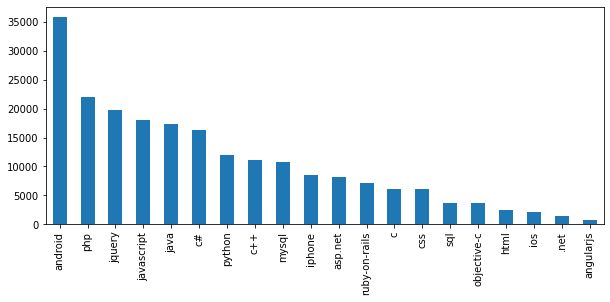

In [ ]:
plt.figure(figsize=(10,4))
df_tags.Tags.value_counts().plot(kind='bar')

					Java							.net


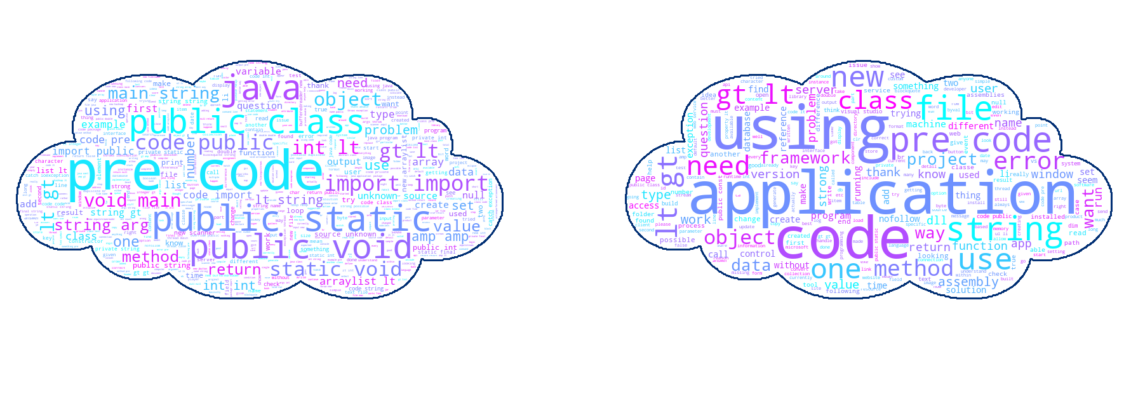

					Asp.net							Html


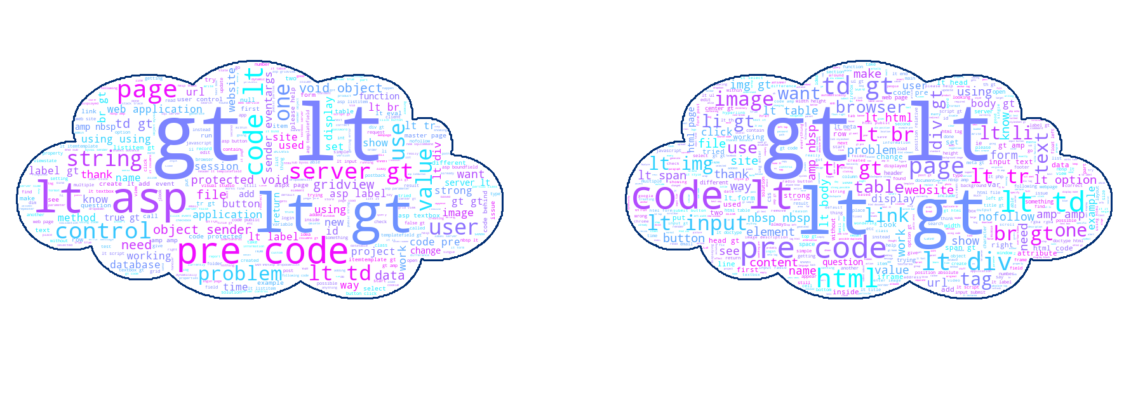

					Ruby-on-rails							C#


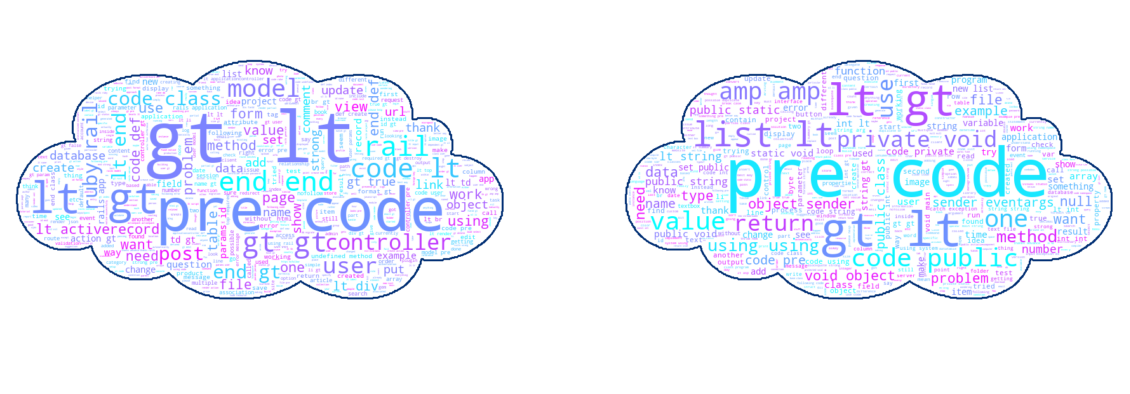

					Mysql							Jquery


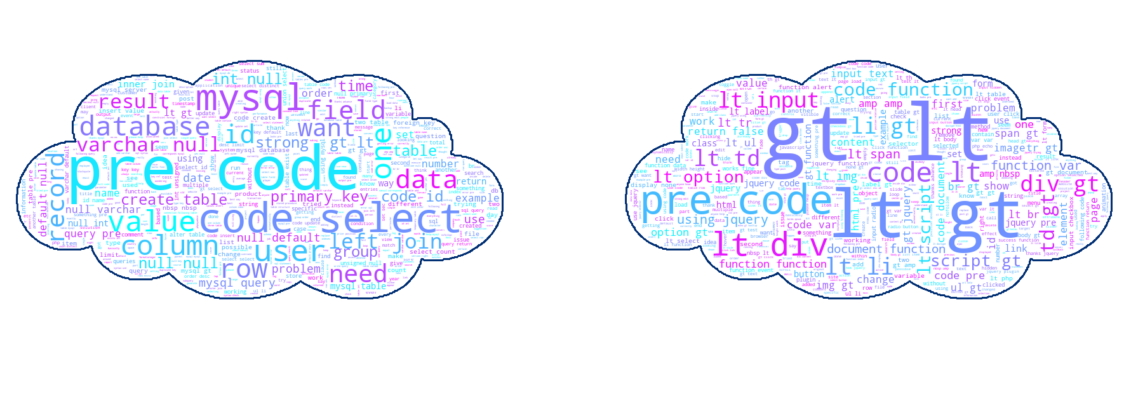

					Ios							Php


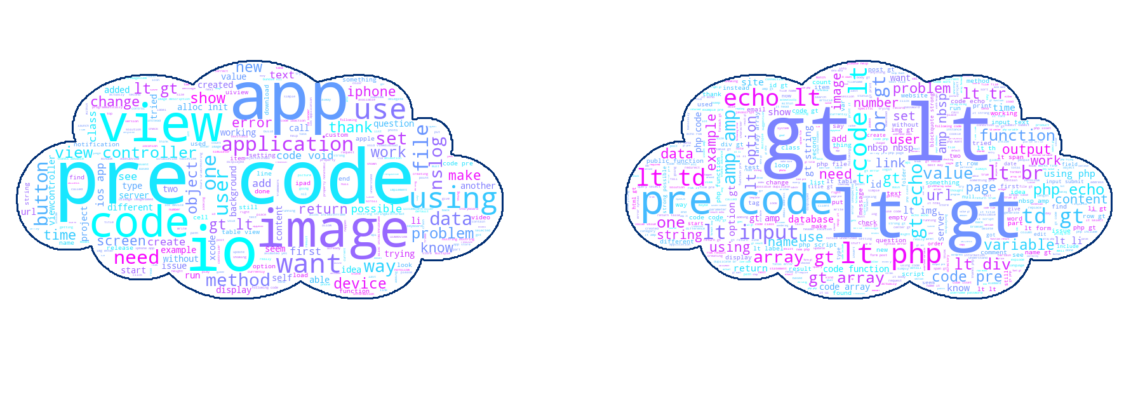

					Python							Javascript


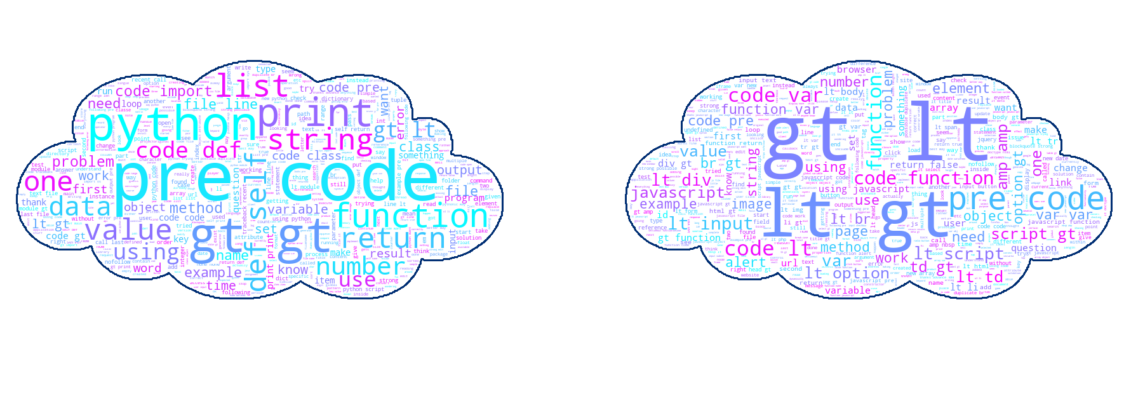

					Css							C


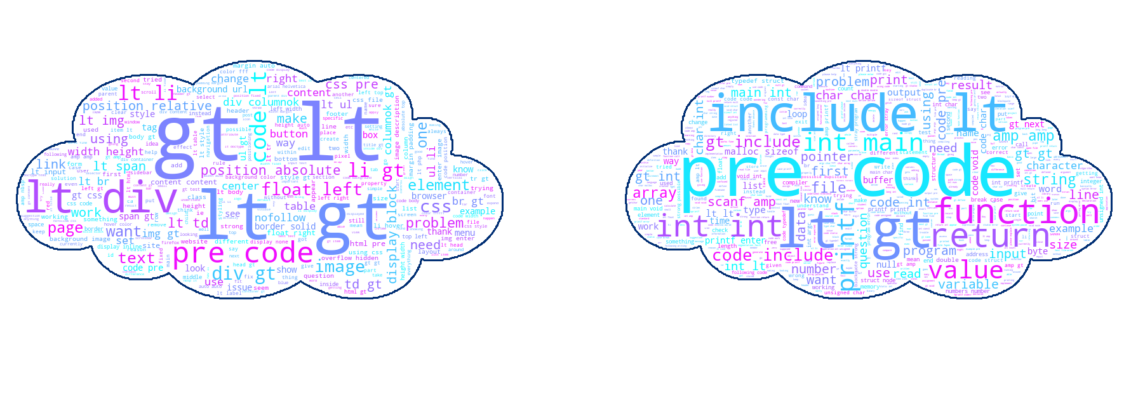

					Iphone							Android


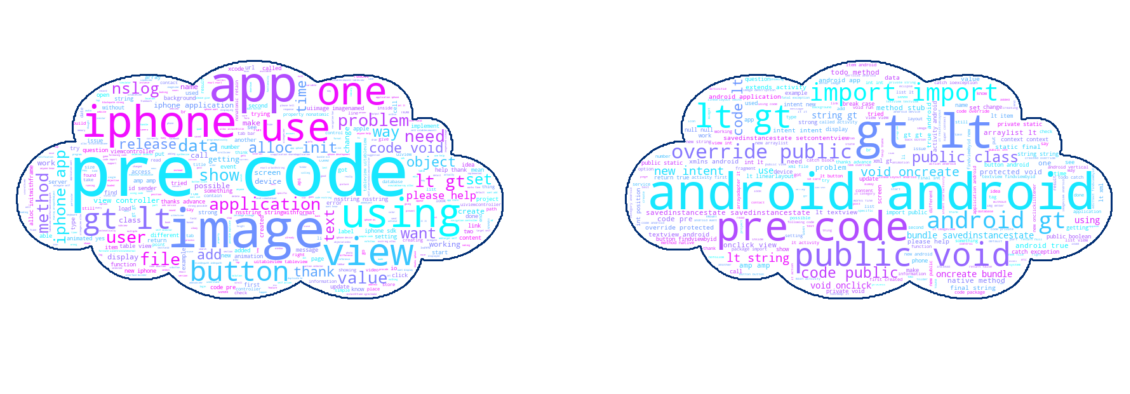

					Objective-c							Sql


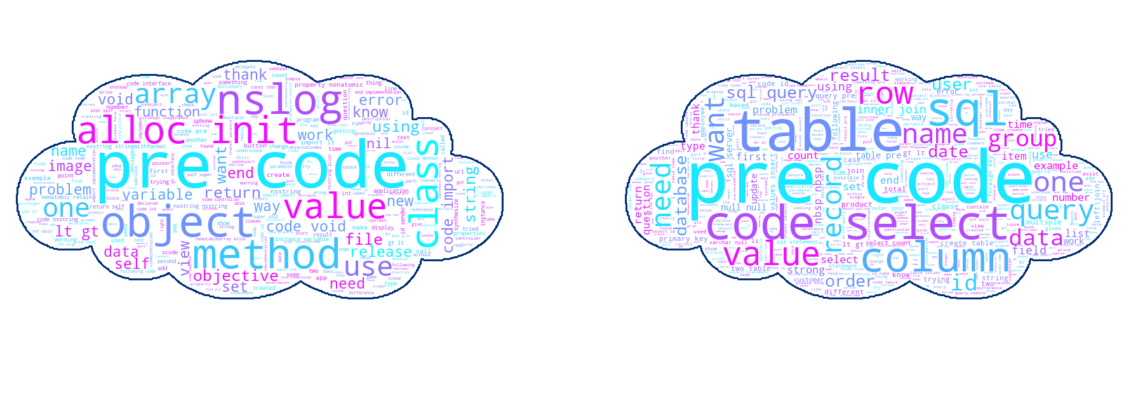

					Angularjs							C++


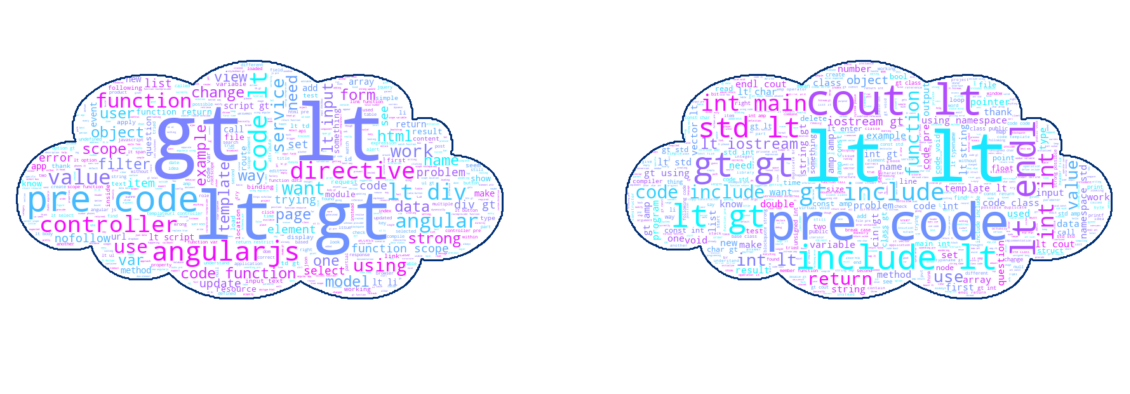

CPU times: user 7min 54s, sys: 9.86 s, total: 8min 4s
Wall time: 8min 5s


In [ ]:
%%time

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from PIL import Image


for i,item in enumerate(list_tags):
  
  if i%2==0:
    tag1 = item
    tag2 = list_tags[i-1]

    # Title:
    title = '\t\t\t\t\t' + tag1.capitalize() + '\t\t\t\t\t\t\t' + tag2.capitalize()
    print(title)

    # Plot side by side
    fig, ax = plt.subplots(1,2, figsize=[20,10])#, title=title)

    # Wordcloud left
    words = " ".join(df_tags[df_tags['Tags']==tag1]['post'])
    def punctuation_stop(text):
        """remove punctuation and stop words"""
        filtered = []
        stop_words = set(stopwords.words('english'))
        word_tokens = word_tokenize(text)
        for w in word_tokens:
            if w not in stop_words and w.isalpha():
                filtered.append(w.lower())
        return filtered
    words_filtered = punctuation_stop(words)
    text = " ".join([ele for ele in words_filtered])
    # wordcloud contour shape
    set_stopwords = set(STOPWORDS)
    mask = np.array(Image.open("./image.png"))

    wc= WordCloud(stopwords=set_stopwords,
                  background_color="white", 
                  colormap='cool', # cool, Dark2, Paired, tab20, gist_earth, brg, (mainly without yellow with a white backround)
                  max_words = 1500, 
                  width =800, height = 1500,
                  mask=mask, 
                  contour_width=3,
                  contour_color='#023075', #'firebrick'
                  random_state=1)
    # wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
    wc.generate(text)
    ax[0].axis('off')
    ax[0].imshow(wc,interpolation="bilinear")

    # Wordcloud right
    words2 = " ".join(df_tags[df_tags['Tags']==tag2]['post'])
    words_filtered2 = punctuation_stop(words2)
    text2 = " ".join([ele for ele in words_filtered2])
    wc2= WordCloud(stopwords=set_stopwords,
                  background_color="white", 
                  colormap='cool', # cool, Dark2, Paired, tab20, gist_earth, brg, (mainly without yellow with a white backround)
                  max_words = 1500, 
                  width =800, height = 1500,
                  mask=mask, 
                  contour_width=3,
                  contour_color='#023075', #'firebrick'
                  random_state=1)
    # wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
    wc2.generate(text2)
    ax[1].axis('off')
    ax[1].imshow(wc2,interpolation="bilinear")

    plt.show()

<a class="anchor" id="TEXT_PREPROCESSING"></a>
## <center style="background-color:Gainsboro; width:80%;">TEXT PREPROCESSING</center>

In [ ]:
# %%time
en_stopwords = stopwords.words('english')

# HTML decoding.
df_tags['post'] = df_tags['post'].apply(lambda x: (BeautifulSoup(x, 'lxml').text).lower())
# Replacing symbols by space in text.
df_tags['post'] = df_tags['post'].str.replace('[/(){}\[\]\|@,;]', ' ', regex=True)
# df_tags['post'] = df_tags['post'].apply(lambda x: re.sub('[/(){}\[\]\|@,;]','  ',x.lower()))
# Deletting symbols from text.
df_tags['post'] = df_tags['post'].str.replace('[^0-9a-z #+_]', '', regex=True)
# df_tags['post'] = df_tags['post'].apply(lambda x: re.sub('[^0-9a-z #+_]',' ',x.lower()))
# Deleting stop words.
df_tags['post'] = df_tags['post'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

df_tags.head(5)

,Tags,post
56,html,tag swallows html strange problem ive struggli...
65,javascript,parentheses mean youre declaring calling prope...
92,jquery,jquery masonry access internal method var advi...
101,php,reliably detecting line breaks php im going bu...
129,mysql,sql expresslike database using mysql create sq...


In [ ]:
df_tags['post'].iloc[1]

'parentheses mean youre declaring calling property example 1function return ok function b thisc var new b alert dc result okexample 2function b thisc var new b alert dc result okwhat parentheses mean case'

<a class="anchor" id="SPLITTING_TRAIN_DATA_AND_TEST_DATA"></a>
## <center style="background-color:Gainsboro; width:80%;">SPLITTING TRAIN DATA AND TEST DATA</center>
The 70% of the data to train and 30% of the data to test.

In [ ]:
X = df_tags.post
y = df_tags.Tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

<a class="anchor" id="Naive_Bayes_Classifier_for_Multinomial_Models"></a>
# <center style="background-color:Gainsboro; width:80%;">Naive Bayes Classifier for Multinomial Models</center>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
# %%time
y_pred = nb.predict(X_test)

accuracy_Naive_Bayes = accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_Naive_Bayes)
print(classification_report(y_test, y_pred,target_names=list_tags))

accuracy 0.5078039473272653


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

         java       0.00      0.00      0.00       426
         html       0.33      1.00      0.49     10705
      asp.net       0.00      0.00      0.00       196
           c#       0.94      0.10      0.18      2440
ruby-on-rails       0.97      0.09      0.17      1801
       jquery       0.79      0.28      0.42      4886
        mysql       0.75      0.42      0.53      3338
          php       0.96      0.10      0.19      1833
          ios       0.00      0.00      0.00       737
   javascript       0.00      0.00      0.00       681
       python       0.62      0.15      0.25      2577
            c       0.74      0.36      0.48      5231
          css       0.88      0.49      0.63      5409
      android       0.64      0.87      0.74      5961
       iphone       0.79      0.37      0.51      3272
          sql       0.93      0.01      0.02      1058
  objective-c       0.57      0.82      0.67      6577
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a class="anchor" id="Linear_support_vector_machine"></a>
# <center style="background-color:Gainsboro; width:80%;">Linear Support Vector Machine</center>

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
%%time

y_pred = sgd.predict(X_test)

accuracy_Linear_SVM = accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_Linear_SVM)
print(classification_report(y_test, y_pred,target_names=list_tags))

accuracy 0.7935941947389822
               precision    recall  f1-score   support

         java       0.64      0.14      0.23       426
         html       0.75      0.98      0.85     10705
      asp.net       0.99      0.37      0.54       196
           c#       0.84      0.75      0.79      2440
ruby-on-rails       0.81      0.63      0.71      1801
       jquery       0.82      0.41      0.55      4886
        mysql       0.79      0.69      0.74      3338
          php       0.85      0.73      0.79      1833
          ios       0.81      0.07      0.13       737
   javascript       0.74      0.17      0.28       681
       python       0.79      0.66      0.72      2577
            c       0.81      0.85      0.83      5231
          css       0.83      0.82      0.83      5409
      android       0.76      0.95      0.84      5961
       iphone       0.71      0.95      0.81      3272
          sql       0.85      0.46      0.60      1058
  objective-c       0.82      0.92  

<a class="anchor" id="Logistic_regression"></a>
# <center style="background-color:Gainsboro; width:80%;">Logistic regression</center>

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5, solver='liblinear')),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(C=100000.0, n_jobs=1, solver='liblinear'))])

In [ ]:
%%time

y_pred = logreg.predict(X_test)

accuracy_Logistic_Reg = accuracy_score(y_pred, y_test)
print('accuracy %s' % accuracy_Logistic_Reg)
print(classification_report(y_test, y_pred,target_names=list_tags))

accuracy 0.8348190547683838
               precision    recall  f1-score   support

         java       0.41      0.26      0.32       426
         html       0.94      0.95      0.95     10705
      asp.net       0.97      0.93      0.95       196
           c#       0.78      0.77      0.78      2440
ruby-on-rails       0.69      0.70      0.69      1801
       jquery       0.64      0.68      0.66      4886
        mysql       0.75      0.71      0.73      3338
          php       0.83      0.88      0.85      1833
          ios       0.61      0.44      0.51       737
   javascript       0.56      0.38      0.45       681
       python       0.72      0.77      0.75      2577
            c       0.83      0.86      0.84      5231
          css       0.84      0.84      0.84      5409
      android       0.90      0.91      0.90      5961
       iphone       0.87      0.88      0.88      3272
          sql       0.67      0.60      0.63      1058
  objective-c       0.88      0.89  

<a class="anchor" id="Resultados"></a>
# <center style="background-color:Gainsboro; width:80%;">Resultados</center>

In [ ]:
df_results = pd.DataFrame([{'Naive Bayes Classifier for Multinomial Models':accuracy_Naive_Bayes, 'Linear support vector machine':accuracy_Linear_SVM, 'Logistic regression':accuracy_Logistic_Reg}]).T
df_results = df_results.rename({0:'Accuracy'}, axis=1)
df_results = df_results.sort_values(by='Accuracy', ascending=False)

display(df_results)



,Accuracy
Logistic regression,0.834819
Linear support vector machine,0.793594
Naive Bayes Classifier for Multinomial Models,0.507804


In [ ]:
print('The better results are given by: ' + df_results.index[0])

The better results are given by: Logistic regression
